In [2]:
pip install tweepy

Note: you may need to restart the kernel to use updated packages.


In [80]:
# import required libraries
import tweepy
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import io
import os
import requests
from bs4 import BeautifulSoup
from timeit import default_timer as timer
%matplotlib inline

In [36]:
# Setup API keys, do not submit
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

# Gather Data
- Programatially download twitter data from WeRateDogs Twitter archive (https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv)
- Programatically download neural network dog predictions (https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv)
- Use Twitter API to pull in the "likes", "retweets", and other data from the archived tweet IDs in the WeRateDogs archive.  Store the tweet data into a json file.

In [12]:
folder_name = 'Data'

# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [215]:
# bring dogs twitter archive into dataframe
dogs_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/59a4e958_twitter-archive-enhanced/twitter-archive-enhanced.csv'
r = requests.get(dogs_url).content
df_dogs = pd.read_csv(io.StringIO(r.decode('utf-8')))

In [31]:
# bring predictions into dataframe
predict_url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(predict_url).content
df_predict = pd.read_csv(io.StringIO(r.decode('utf-8')),sep='\t')

In [38]:
# use API to bring in data points from archived tweets
tweet = api.get_status(id='892420643555336193')
print(tweet.text)

This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU


In [74]:
# interpret the json data pulled via API
tweet._json

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 540, 'h': 528, 'resize': 'fit'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'large': {'w': 540, 'h': 528, 'resize': 'fit'}}}]},


- we can use favorite count, retweet count, text (could use to QA archive), lang, source, and the user follower count

In [162]:
df_list = []
fails_dict = {}
start = timer()
count = 0
for tweetid in df_dogs.tweet_id:
    count += 1
    print(str(count) + ": " + str(tweetid))
    try:
        tweet = api.get_status(id=tweetid, tweet_mode='extended'
                              ,wait_on_rate_limit=True,wait_on_rate_limit_notify=True)
        print("Success")
        df_list.append({'tweetid':tweetid,
                        'favorite_count':tweet.favorite_count,
                        'retweet_count': tweet.retweet_count,
                        #'text':tweet.text,
                        'lang':tweet.lang,
                        'source':tweet.source,
                        'followers_count':tweet.user.followers_count})
    except tweepy.TweepError as e:
        print("Fail")
        fails_dict[tweetid] = e
        pass
end = timer()     
print(end - start)
print(fails_dict)

1: 892420643555336193
Success
2: 892177421306343426
Success
3: 891815181378084864
Success
4: 891689557279858688
Success
5: 891327558926688256
Success
6: 891087950875897856
Success
7: 890971913173991426
Success
8: 890729181411237888
Success
9: 890609185150312448
Success
10: 890240255349198849
Success
11: 890006608113172480
Success
12: 889880896479866881
Success
13: 889665388333682689
Success
14: 889638837579907072
Success
15: 889531135344209921
Success
16: 889278841981685760
Success
17: 888917238123831296
Success
18: 888804989199671297
Success
19: 888554962724278272
Success
20: 888202515573088257
Fail
21: 888078434458587136
Success
22: 887705289381826560
Success
23: 887517139158093824
Success
24: 887473957103951883
Success
25: 887343217045368832
Success
26: 887101392804085760
Success
27: 886983233522544640
Success
28: 886736880519319552
Success
29: 886680336477933568
Success
30: 886366144734445568
Success
31: 886267009285017600
Success
32: 886258384151887873
Success
33: 8860541600590725

Fail
262: 842846295480000512
Success
263: 842765311967449089
Success
264: 842535590457499648
Success
265: 842163532590374912
Success
266: 842115215311396866
Success
267: 841833993020538882
Success
268: 841680585030541313
Success
269: 841439858740625411
Success
270: 841320156043304961
Success
271: 841314665196081154
Success
272: 841077006473256960
Success
273: 840761248237133825
Success
274: 840728873075638272
Success
275: 840698636975636481
Success
276: 840696689258311684
Success
277: 840632337062862849
Success
278: 840370681858686976
Success
279: 840268004936019968
Success
280: 839990271299457024
Success
281: 839549326359670784
Success
282: 839290600511926273
Success
283: 839239871831150596
Success
284: 838952994649550848
Success
285: 838921590096166913
Success
286: 838916489579200512
Success
287: 838831947270979586
Success
288: 838561493054533637
Success
289: 838476387338051585
Success
290: 838201503651401729
Success
291: 838150277551247360
Success
292: 838085839343206401
Success
293

Success
520: 810284430598270976
Success
521: 810254108431155201
Success
522: 809920764300447744
Success
523: 809808892968534016
Success
524: 809448704142938112
Success
525: 809220051211603969
Success
526: 809084759137812480
Success
527: 808838249661788160
Success
528: 808733504066486276
Success
529: 808501579447930884
Success
530: 808344865868283904
Success
531: 808134635716833280
Success
532: 808106460588765185
Success
533: 808001312164028416
Success
534: 807621403335917568
Success
535: 807106840509214720
Success
536: 807059379405148160
Success
537: 807010152071229440
Success
538: 806629075125202948
Success
539: 806620845233815552
Success
540: 806576416489959424
Success
541: 806542213899489280
Success
542: 806242860592926720
Success
543: 806219024703037440
Success
544: 805958939288408065
Success
545: 805932879469572096
Success
546: 805826884734976000
Success
547: 805823200554876929
Success
548: 805520635690676224
Success
549: 805487436403003392
Success
550: 805207613751304193
Success


Success
778: 776088319444877312
Success
779: 775898661951791106
Success
780: 775842724423557120
Success
781: 775733305207554048
Success
782: 775729183532220416
Success
783: 775364825476165632
Success
784: 775350846108426240
Success
785: 775096608509886464
Fail
786: 775085132600442880
Success
787: 774757898236878852
Success
788: 774639387460112384
Success
789: 774314403806253056
Success
790: 773985732834758656
Success
791: 773922284943896577
Success
792: 773704687002451968
Success
793: 773670353721753600
Success
794: 773547596996571136
Success
795: 773336787167145985
Success
796: 773308824254029826
Success
797: 773247561583001600
Success
798: 773191612633579521
Success
799: 772877495989305348
Success
800: 772826264096874500
Success
801: 772615324260794368
Success
802: 772581559778025472
Success
803: 772193107915964416
Success
804: 772152991789019136
Success
805: 772117678702071809
Success
806: 772114945936949249
Success
807: 772102971039580160
Success
808: 771908950375665664
Success
809

Rate limit reached. Sleeping for: 738


Success
901: 758740312047005698
Success
902: 758474966123810816
Success
903: 758467244762497024
Success
904: 758405701903519748
Success
905: 758355060040593408
Success
906: 758099635764359168
Success
907: 758041019896193024
Success
908: 757741869644341248
Success
909: 757729163776290825
Success
910: 757725642876129280
Success
911: 757611664640446465
Success
912: 757597904299253760
Success
913: 757596066325864448
Success
914: 757400162377592832
Success
915: 757393109802180609
Success
916: 757354760399941633
Success
917: 756998049151549440
Success
918: 756939218950160384
Success
919: 756651752796094464
Success
920: 756526248105566208
Success
921: 756303284449767430
Success
922: 756288534030475264
Success
923: 756275833623502848
Success
924: 755955933503782912
Success
925: 755206590534418437
Success
926: 755110668769038337
Success
927: 754874841593970688
Success
928: 754856583969079297
Success
929: 754747087846248448
Success
930: 754482103782404096
Success
931: 754449512966619136
Success


Success
1154: 725729321944506368
Success
1155: 725458796924002305
Success
1156: 724983749226668032
Success
1157: 724771698126512129
Success
1158: 724405726123311104
Success
1159: 724049859469295616
Success
1160: 724046343203856385
Success
1161: 724004602748780546
Success
1162: 723912936180330496
Success
1163: 723688335806480385
Success
1164: 723673163800948736
Success
1165: 723179728551723008
Success
1166: 722974582966214656
Success
1167: 722613351520608256
Success
1168: 721503162398597120
Success
1169: 721001180231503872
Success
1170: 720785406564900865
Success
1171: 720775346191278080
Success
1172: 720415127506415616
Success
1173: 720389942216527872
Success
1174: 720340705894408192
Success
1175: 720059472081784833
Success
1176: 720043174954147842
Success
1177: 719991154352222208
Success
1178: 719704490224398336
Success
1179: 719551379208073216
Success
1180: 719367763014393856
Success
1181: 719339463458033665
Success
1182: 719332531645071360
Success
1183: 718971898235854848
Success
11

Success
1403: 699423671849451520
Success
1404: 699413908797464576
Success
1405: 699370870310113280
Success
1406: 699323444782047232
Success
1407: 699088579889332224
Success
1408: 699079609774645248
Success
1409: 699072405256409088
Success
1410: 699060279947165696
Success
1411: 699036661657767936
Success
1412: 698989035503689728
Success
1413: 698953797952008193
Success
1414: 698907974262222848
Success
1415: 698710712454139905
Success
1416: 698703483621523456
Success
1417: 698635131305795584
Success
1418: 698549713696649216
Success
1419: 698355670425473025
Success
1420: 698342080612007937
Success
1421: 698262614669991936
Success
1422: 698195409219559425
Success
1423: 698178924120031232
Success
1424: 697995514407682048
Success
1425: 697990423684476929
Success
1426: 697943111201378304
Success
1427: 697881462549430272
Success
1428: 697630435728322560
Success
1429: 697616773278015490
Success
1430: 697596423848730625
Success
1431: 697575480820686848
Success
1432: 697516214579523584
Success
14

Success
1652: 683498322573824003
Success
1653: 683481228088049664
Success
1654: 683462770029932544
Success
1655: 683449695444799489
Success
1656: 683391852557561860
Success
1657: 683357973142474752
Success
1658: 683142553609318400
Success
1659: 683111407806746624
Success
1660: 683098815881154561
Success
1661: 683078886620553216
Success
1662: 683030066213818368
Success
1663: 682962037429899265
Success
1664: 682808988178739200
Success
1665: 682788441537560576
Success
1666: 682750546109968385
Success
1667: 682697186228989953
Success
1668: 682662431982772225
Success
1669: 682638830361513985
Success
1670: 682429480204398592
Success
1671: 682406705142087680
Success
1672: 682393905736888321
Success
1673: 682389078323662849
Success
1674: 682303737705140231
Success
1675: 682259524040966145
Success
1676: 682242692827447297
Success
1677: 682088079302213632
Success
1678: 682059653698686977
Success
1679: 682047327939461121
Success
1680: 682032003584274432
Success
1681: 682003177596559360
Success
16

Rate limit reached. Sleeping for: 730


Success
1802: 676957860086095872
Success
1803: 676949632774234114
Success
1804: 676948236477857792
Success
1805: 676946864479084545
Success
1806: 676942428000112642
Success
1807: 676936541936185344
Success
1808: 676916996760600576
Success
1809: 676897532954456065
Success
1810: 676864501615042560
Success
1811: 676821958043033607
Success
1812: 676819651066732545
Success
1813: 676811746707918848
Success
1814: 676776431406465024
Success
1815: 676617503762681856
Success
1816: 676613908052996102
Success
1817: 676606785097199616
Success
1818: 676603393314578432
Success
1819: 676593408224403456
Success
1820: 676590572941893632
Success
1821: 676588346097852417
Success
1822: 676582956622721024
Success
1823: 676575501977128964
Success
1824: 676533798876651520
Success
1825: 676496375194980353
Success
1826: 676470639084101634
Success
1827: 676440007570247681
Success
1828: 676430933382295552
Success
1829: 676263575653122048
Success
1830: 676237365392908289
Success
1831: 676219687039057920
Success
18

Success
2052: 671488513339211776
Success
2053: 671486386088865792
Success
2054: 671485057807351808
Success
2055: 671390180817915904
Success
2056: 671362598324076544
Success
2057: 671357843010908160
Success
2058: 671355857343524864
Success
2059: 671347597085433856
Success
2060: 671186162933985280
Success
2061: 671182547775299584
Success
2062: 671166507850801152
Success
2063: 671163268581498880
Success
2064: 671159727754231808
Success
2065: 671154572044468225
Success
2066: 671151324042559489
Success
2067: 671147085991960577
Success
2068: 671141549288370177
Success
2069: 671138694582165504
Success
2070: 671134062904504320
Success
2071: 671122204919246848
Success
2072: 671115716440031232
Success
2073: 671109016219725825
Success
2074: 670995969505435648
Success
2075: 670842764863651840
Success
2076: 670840546554966016
Success
2077: 670838202509447168
Success
2078: 670833812859932673
Success
2079: 670832455012716544
Success
2080: 670826280409919488
Success
2081: 670823764196741120
Success
20

Success
2301: 667062181243039745
Success
2302: 667044094246576128
Success
2303: 667012601033924608
Success
2304: 666996132027977728
Success
2305: 666983947667116034
Success
2306: 666837028449972224
Success
2307: 666835007768551424
Success
2308: 666826780179869698
Success
2309: 666817836334096384
Success
2310: 666804364988780544
Success
2311: 666786068205871104
Success
2312: 666781792255496192
Success
2313: 666776908487630848
Success
2314: 666739327293083650
Success
2315: 666701168228331520
Success
2316: 666691418707132416
Success
2317: 666649482315059201
Success
2318: 666644823164719104
Success
2319: 666454714377183233
Success
2320: 666447344410484738
Success
2321: 666437273139982337
Success
2322: 666435652385423360
Success
2323: 666430724426358785
Success
2324: 666428276349472768
Success
2325: 666421158376562688
Success
2326: 666418789513326592
Success
2327: 666411507551481857
Success
2328: 666407126856765440
Success
2329: 666396247373291520
Success
2330: 666373753744588802
Success
23

In [106]:
# check fails
fails_dict

{888202515573088257: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 873697596434513921: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872668790621863937: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 872261713294495745: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 869988702071779329: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 866816280283807744: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 861769973181624320: tweepy.error.TweepError([{'code': 144,
                           'message': 'No status found with that ID.'}]),
 856602993587888130: tweepy.error.TweepError([{'code': 144,
  

Failed pulls appear to no longer exist.  These tweets may have been removed since.

In [164]:
# convert list to pandas DataFrame
df_api = pd.DataFrame(df_list)

In [165]:
# we probably don't need the followers_count field, it looks like
df_api.head()

,tweetid,favorite_count,retweet_count,lang,source,followers_count
0,892420643555336193,36217,7707,en,Twitter for iPhone,8784787
1,892177421306343426,31225,5697,en,Twitter for iPhone,8784787
2,891815181378084864,23505,3777,en,Twitter for iPhone,8784787
3,891689557279858688,39485,7864,en,Twitter for iPhone,8784787
4,891327558926688256,37704,8481,en,Twitter for iPhone,8784787


In [166]:
# pull data into CSV
df_api.to_csv('apidata.csv')

**We are now left with three dataframes.**

- df_dogs
- df_predict
- df_api

# Assess
- Visually check all data frames for data quality and tidyiness
- Programatically check data frames

**Dogs DataFrame**

**$Quality$**

*these fields do not have complete data, they are also not original tweets (replies/retweets) and should be removed*
- *in_reply_to_status_id*
- *in_reply_to_user_id*
- *retweeted_status_id*
- *retweeted_status_user_id*
- *retweeted_status_timestamp*

<br>

- Timestamp is not in the correct datetime format
- Source field contains html tag format and can be pulled from twitter API dataframe
- Name contains fields with single letter
- investigate duplicate urls, but unique tweetids
- expanded_urls appears to have missing data


**$Tidiness$**

- doggo	floofer	pupper	puppo fields need to be renamed for more clarification (if hierarchical)
    - like doggo_1, floofer_2, etc
- 

In [119]:
df_dogs.tail(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2306,666835007768551424,NaN,NaN,2015-11-18 04:27:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These are Peruvian Feldspars. Their names are ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666835007...,10,10,None,None,None,None,None
2307,666826780179869698,NaN,NaN,2015-11-18 03:54:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 simply brilliant pup https://t.co/V6ZzG4...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666826780...,12,10,None,None,None,None,None
2308,666817836334096384,NaN,NaN,2015-11-18 03:18:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jeph. He is a German Boston Shuttlecoc...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666817836...,9,10,Jeph,None,None,None,None
2309,666804364988780544,NaN,NaN,2015-11-18 02:25:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Jockson. He is a Pinnacle Sagittarius....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666804364...,8,10,Jockson,None,None,None,None
2310,666786068205871104,NaN,NaN,2015-11-18 01:12:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Unfamiliar with this breed. Ears pointy af. Wo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666786068...,2,10,None,None,None,None,None
2311,666781792255496192,NaN,NaN,2015-11-18 00:55:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Bacardi named Octaviath. Ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666781792...,10,10,a,None,None,None,None
2312,666776908487630848,NaN,NaN,2015-11-18 00:36:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Josep. He is a Rye Manganese mix. Can ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666776908...,5,10,Josep,None,None,None,None
2313,666739327293083650,NaN,NaN,2015-11-17 22:06:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Lugan. He is a Bohemian Rhapsody. Very...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666739327...,10,10,Lugan,None,None,None,None
2314,666701168228331520,NaN,NaN,2015-11-17 19:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a golden Buckminsterfullerene named Jo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666701168...,8,10,a,None,None,None,None
2315,666691418707132416,NaN,NaN,2015-11-17 18:56:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Christoper. He is a spotted Penne. Can...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666691418...,8,10,Christoper,None,None,None,None


In [139]:
# we acutally have duplicate tweet urls but the tweet ids are unique
print(df_dogs.expanded_urls.duplicated().sum())
print(df_dogs.tweet_id.duplicated().sum())

137
0


In [113]:
df_dogs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [122]:
# Check for full duplicates
df_dogs[df_dogs.duplicated()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


In [126]:
# Check for duplicate tweet ids
df_dogs.tweet_id.duplicated().sum()

0

**Predict DataFrame**

***Quality***

- nothing visually
- investigate duplicate images, unique tweet_ids

***Tidiness***

- p1: p1_breed
- p1_conf: p1_confidence	
- p1_dog: p1_isdog
- These prediction can be appended to the dogs df

In [120]:
df_predict.tail(50)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2025,881906580714921986,https://pbs.twimg.com/media/DD0pWm9XcAAeSBL.jpg,1,Weimaraner,0.291539,True,Chesapeake_Bay_retriever,0.278966,True,koala,0.127017,False
2026,882045870035918850,https://pbs.twimg.com/media/DD2oCl2WAAEI_4a.jpg,1,web_site,0.949591,False,dhole,0.017326,False,golden_retriever,0.006941,True
2027,882268110199369728,https://pbs.twimg.com/media/DD5yKdPW0AArzX8.jpg,1,golden_retriever,0.762211,True,Labrador_retriever,0.098985,True,cocker_spaniel,0.017199,True
2028,882627270321602560,https://pbs.twimg.com/media/DD-40X3WAAAJPU5.jpg,1,Pembroke,0.542982,True,Chihuahua,0.251988,True,Cardigan,0.107699,True
2029,882762694511734784,https://pbs.twimg.com/media/DEAz_HHXsAA-p_z.jpg,1,Labrador_retriever,0.850050,True,Chesapeake_Bay_retriever,0.074257,True,flat-coated_retriever,0.015579,True
2030,882992080364220416,https://pbs.twimg.com/media/DEEEnIqXYAAiJh_.jpg,1,Eskimo_dog,0.466778,True,Siberian_husky,0.406044,True,dingo,0.073414,False
2031,883117836046086144,https://pbs.twimg.com/media/DEF2-_hXoAAs62q.jpg,2,golden_retriever,0.949562,True,Labrador_retriever,0.045948,True,kuvasz,0.002471,True
2032,883360690899218434,https://pbs.twimg.com/media/DEJT3FeXoAAtwUy.jpg,1,chow,0.987997,True,Tibetan_mastiff,0.007099,True,Newfoundland,0.002140,True
2033,883482846933004288,https://pbs.twimg.com/media/DELC9dZXUAADqUk.jpg,1,golden_retriever,0.943082,True,Labrador_retriever,0.032409,True,kuvasz,0.005501,True
2034,883838122936631299,https://pbs.twimg.com/media/DEQGFgAXUAAEvfi.jpg,1,Doberman,0.610946,True,miniature_pinscher,0.299603,True,kelpie,0.063020,True


In [129]:
# check for missing data and datatypes
df_predict.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [134]:
# check for duplicates
print(df_predict.duplicated().sum())
print(df_predict.tweet_id.duplicated().sum())
print(df_predict.jpg_url.duplicated().sum()) # looks like we have 66 images that are the actually same

0
0
66


In [143]:
# there are a lot of random predictions with low volume, we will accept these predictions
print(df_predict.p1.value_counts().head(20))
print(df_predict.p1.value_counts().tail(20))

golden_retriever             150
Labrador_retriever           100
Pembroke                      89
Chihuahua                     83
pug                           57
chow                          44
Samoyed                       43
toy_poodle                    39
Pomeranian                    38
cocker_spaniel                30
malamute                      30
French_bulldog                26
miniature_pinscher            23
Chesapeake_Bay_retriever      23
seat_belt                     22
Siberian_husky                20
German_shepherd               20
Staffordshire_bullterrier     20
Cardigan                      19
web_site                      19
Name: p1, dtype: int64
ice_lolly       1
polecat         1
crash_helmet    1
clumber         1
bearskin        1
ocarina         1
hammer          1
African_grey    1
bonnet          1
hummingbird     1
fire_engine     1
hay             1
tricycle        1
sea_urchin      1
stove           1
lorikeet        1
school_bus      1
beaver     

**API DataFrame**

***Quality***

- Visually nothing looks off
- Dedupe

***Tidiness***

- These values could be appended to the Dogs df

 

In [147]:
df_api.head(50)

,favorite_count,retweet_count,lang,source,followers_count
0,36222,7708,en,Twitter for iPhone,8786806
1,31231,5698,en,Twitter for iPhone,8786806
2,23513,3777,en,Twitter for iPhone,8786806
3,39498,7864,en,Twitter for iPhone,8786806
4,37707,8483,en,Twitter for iPhone,8786806
5,18999,2842,en,Twitter for iPhone,8786806
6,11065,1848,en,Twitter for iPhone,8786806
7,61002,17202,en,Twitter for iPhone,8786806
8,26158,3913,en,Twitter for iPhone,8786806
9,29884,6697,en,Twitter for iPhone,8786806


In [167]:
# check for missing data and incorrect data types
df_api.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   tweetid          2331 non-null   int64 
 1   favorite_count   2331 non-null   int64 
 2   retweet_count    2331 non-null   int64 
 3   lang             2331 non-null   object
 4   source           2331 non-null   object
 5   followers_count  2331 non-null   int64 
dtypes: int64(4), object(2)
memory usage: 109.4+ KB


In [168]:
# check for outliers
df_api.describe()

,tweetid,favorite_count,retweet_count,followers_count
count,2.331000e+03,2331.000000,2331.000000,2.331000e+03
mean,7.419079e+17,7558.710854,2703.925354,8.784799e+06
std,6.823170e+16,11732.656604,4572.186637,6.408864e+01
min,6.660209e+17,0.000000,1.000000,8.784217e+06
25%,6.782670e+17,1317.000000,546.500000,8.784793e+06
50%,7.182469e+17,3285.000000,1267.000000,8.784811e+06
75%,7.986692e+17,9256.000000,3143.000000,8.784811e+06
max,8.924206e+17,156235.000000,77804.000000,8.784824e+06


In [169]:
# check for duplicates
print(df_api.duplicated().sum())
df_api[df_api.duplicated()]

0


,tweetid,favorite_count,retweet_count,lang,source,followers_count


In [171]:
df_api.tweetid

0       892420643555336193
1       892177421306343426
2       891815181378084864
3       891689557279858688
4       891327558926688256
               ...        
2326    666049248165822465
2327    666044226329800704
2328    666033412701032449
2329    666029285002620928
2330    666020888022790149
Name: tweetid, Length: 2331, dtype: int64

# Cleaning Data


In [182]:
df_dogs_clean = df_dogs
df_predict_clean = df_predict
df_api_clean = df_api

In [177]:
df_dogs_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [183]:
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

### Quality (1,2,3,4,5/8)

In [195]:
# Define: the variables in relations to reply and retweet need to be removed as they are not tier 1 tweets
# only keep original tweets by removing retweets and replies
df_dogs_clean = df_dogs_clean[df_dogs_clean.in_reply_to_status_id.isnull()]
df_dogs_clean = df_dogs_clean[df_dogs_clean.in_reply_to_user_id.isnull()]
df_dogs_clean = df_dogs_clean[df_dogs_clean.retweeted_status_id.isnull()]
df_dogs_clean = df_dogs_clean[df_dogs_clean.retweeted_status_user_id.isnull()]
df_dogs_clean = df_dogs_clean[df_dogs_clean.retweeted_status_timestamp.isnull()]
#these are tweetids that are the original tweet
#df_dogs_clean[df_dogs_clean.in_reply_to_status_id.notna()]

In [196]:
#check for values in retweet/reply fields, should be 0
df_dogs_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2097 non-null   int64  
 1   in_reply_to_status_id       0 non-null      float64
 2   in_reply_to_user_id         0 non-null      float64
 3   timestamp                   2097 non-null   object 
 4   source                      2097 non-null   object 
 5   text                        2097 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2094 non-null   object 
 10  rating_numerator            2097 non-null   int64  
 11  rating_denominator          2097 non-null   int64  
 12  name                        2097 non-null   object 
 13  doggo                       2097 

In [202]:
# look for bad dog names
df_dogs_clean.name.value_counts()

None       745
a           55
Charlie     12
Lucy        11
Cooper      11
          ... 
Petrick      1
Joey         1
Wiggles      1
Gert         1
Cannon       1
Name: name, Length: 957, dtype: int64

### Quality (6/8)

In [216]:
# change dogs named "a" to None
df_dogs_clean.loc[df_dogs_clean.name == 'a', 'name'] = 'None'

In [217]:
# check for successful name update
df_dogs_clean[df_dogs_clean.name == 'a']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo


### Quality (7/8)

In [225]:
# fix timestamp data format
import datetime
df_dogs_clean.timestamp = pd.to_datetime(df_dogs_clean.timestamp)

In [229]:
# check if datatype has been fixed
df_dogs_clean.timestamp.dtypes

datetime64[ns, UTC]

### Quality (8/8)

In [235]:
# remove records without an extended url
df_dogs_clean = df_dogs_clean[df_dogs_clean.expanded_urls.notna()]

In [232]:
df_dogs_clean.expanded_urls

0       https://twitter.com/dog_rates/status/892420643...
1       https://twitter.com/dog_rates/status/892177421...
2       https://twitter.com/dog_rates/status/891815181...
3       https://twitter.com/dog_rates/status/891689557...
4       https://twitter.com/dog_rates/status/891327558...
                              ...                        
2351    https://twitter.com/dog_rates/status/666049248...
2352    https://twitter.com/dog_rates/status/666044226...
2353    https://twitter.com/dog_rates/status/666033412...
2354    https://twitter.com/dog_rates/status/666029285...
2355    https://twitter.com/dog_rates/status/666020888...
Name: expanded_urls, Length: 2097, dtype: object

In [238]:
# check if null expanded urls are removed
df_dogs_clean.expanded_urls.isnull().sum()

0

### Tidy (1/2)

In [258]:
# checking if there are any overlapping dog "stage"
# if there is no overlap we can update a new column with fields where value is not 'None'
df_dogs_clean[['doggo','floofer','pupper','puppo']].apply(pd.value_counts)

,doggo,floofer,pupper,puppo
None,2011.0,2084.0,1865.0,2070.0
doggo,83.0,NaN,NaN,NaN
floofer,NaN,10.0,NaN,NaN
pupper,NaN,NaN,229.0,NaN
puppo,NaN,NaN,NaN,24.0


In [297]:
# create new dog_stage column and update using four other columns
df_dogs_clean['dog_stage'] = ''
df_dogs_clean.loc[df_dogs_clean.doggo == 'doggo','dog_stage'] = 'doggo'
df_dogs_clean.loc[df_dogs_clean.floofer == 'floofer','dog_stage'] = 'floofer'      
df_dogs_clean.loc[df_dogs_clean.pupper == 'pupper','dog_stage'] = 'pupper'      
df_dogs_clean.loc[df_dogs_clean.puppo == 'puppo','dog_stage'] = 'puppo'
df_dogs_clean.loc[df_dogs_clean.dog_stage == '','dog_stage'] = 'None'

In [299]:
df_dogs_clean.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo


In [306]:
# check that dog_stage is updated
df_dogs_clean[df_dogs_clean.dog_stage != 'None']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo
12,889665388333682689,NaN,NaN,2017-07-25 01:55:32+00:00,iPhone,Here's a puppo that seems to be on the fence a...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889665388...,13,10,None,None,None,None,puppo,puppo
14,889531135344209921,NaN,NaN,2017-07-24 17:02:04+00:00,iPhone,This is Stuart. He's sporting his favorite fan...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/889531135...,13,10,Stuart,None,None,None,puppo,puppo
29,886366144734445568,NaN,NaN,2017-07-15 23:25:31+00:00,iPhone,This is Roscoe. Another pupper fallen victim t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/886366144...,12,10,Roscoe,None,None,pupper,None,pupper
43,884162670584377345,NaN,NaN,2017-07-09 21:29:42+00:00,iPhone,Meet Yogi. He doesn't have any important dog m...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/884162670...,12,10,Yogi,doggo,None,None,None,doggo
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,672594978741354496,NaN,NaN,2015-12-04 01:55:13+00:00,iPhone,Meet Scott. Just trying to catch his train to ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672594978...,9,10,Scott,None,None,pupper,None,pupper
2002,672481316919734272,NaN,NaN,2015-12-03 18:23:34+00:00,iPhone,Say hello to Jazz. She should be on the cover ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672481316...,12,10,Jazz,None,None,pupper,None,pupper
2009,672254177670729728,NaN,NaN,2015-12-03 03:21:00+00:00,iPhone,This is Rolf. He's having the time of his life...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672254177...,11,10,Rolf,None,None,pupper,None,pupper
2015,672205392827572224,NaN,NaN,2015-12-03 00:07:09+00:00,iPhone,This is Opal. He's a Royal John Coctostan. Rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672205392...,9,10,Opal,None,None,pupper,None,pupper


### Quality (9/8)

In [301]:
# view differnt formats for source field
df_dogs_clean.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     1962
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       30
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [304]:
# clean up the source field
df_dogs_clean.loc[df_dogs_clean.source == '<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>','source'] = 'iPhone'
df_dogs_clean.loc[df_dogs_clean.source == '<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>','source'] = 'Vine'      
df_dogs_clean.loc[df_dogs_clean.source == '<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>','source'] = 'Web Client'      
df_dogs_clean.loc[df_dogs_clean.source == '<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>','source'] = 'TweetDeck'


In [305]:
# check source field is clean
df_dogs_clean.source.value_counts()

iPhone        1962
Vine            91
Web Client      30
TweetDeck       11
Name: source, dtype: int64

### Quality (10/8)

In [311]:
# find duplicated URLs
df_dogs_clean[df_dogs_clean.expanded_urls.duplicated()].expanded_urls

2212    https://vine.co/v/ea0OwvPTx9l
Name: expanded_urls, dtype: object

In [312]:
# this vine was actually rated/tweeted twice, and rated two different scores
df_dogs_clean[df_dogs_clean['expanded_urls'] == 'https://vine.co/v/ea0OwvPTx9l']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48+00:00,Vine,Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None,None
2212,668587383441514497,NaN,NaN,2015-11-23 00:30:28+00:00,Vine,Never forget this vine. You will not stop watc...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,13,10,the,None,None,None,None,None


In [313]:
# remove the older version of the image
df_dogs_clean = df_dogs_clean[df_dogs_clean['tweet_id'] != 668587383441514497]

In [314]:
# check the duplicate image was removed
df_dogs_clean[df_dogs_clean['expanded_urls'] == 'https://vine.co/v/ea0OwvPTx9l']

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
657,791774931465953280,NaN,NaN,2016-10-27 22:53:48+00:00,Vine,Vine will be deeply missed. This was by far my...,NaN,NaN,NaN,https://vine.co/v/ea0OwvPTx9l,14,10,None,None,None,None,None,None


### Tidyness (2/2)

In [338]:
# add score field (numerator / denominator)
df_dogs_clean['score'] = df_dogs_clean.rating_numerator / df_dogs_clean.rating_denominator

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [339]:
# check new score field, float
df_dogs_clean['score'] 

0       1.3
1       1.3
2       1.2
3       1.3
4       1.2
       ... 
2351    0.5
2352    0.6
2353    0.9
2354    0.7
2355    0.8
Name: score, Length: 2093, dtype: float64

In [396]:
# it looks like there are a handful of outlier scores
df_dogs_clean['score'].value_counts()

1.200000      489
1.000000      436
1.100000      418
1.300000      286
0.900000      153
0.800000       98
0.700000       51
1.400000       38
0.500000       35
0.600000       32
0.300000       19
0.400000       15
0.200000       10
0.100000        4
2.700000        1
3.428571        1
0.636364        1
177.600000      1
2.600000        1
42.000000       1
7.500000        1
0.000000        1
0.818182        1
Name: score, dtype: int64

In [402]:
# lets remove the outliers (3 stds from mean)
print('mean of scores:',df_dogs_clean['score'].mean())
print('stdev of scores:',df_dogs_clean['score'].std())

# anything greater than 13.07 is an outlier
print('non-outlier max:',df_dogs_clean['score'].mean()+ 3*df_dogs_clean['score'].std())
print('non-outlier min:',df_dogs_clean['score'].mean()- 3*df_dogs_clean['score'].std())

mean of scores: 1.1693660376890171
stdev of scores: 3.969717219503568
non-outlier max: 13.07851769619972
non-outlier min: -10.739785620821687


In [410]:
#[df_dogs_clean['score'] < (df_dogs_clean['score'].mean()+ 3*df_dogs_clean['score'].std())] 2093
df_dogs_clean = df_dogs_clean.query('score < 13.07')
df_dogs_clean['score'].value_counts()

1.200000    489
1.000000    436
1.100000    418
1.300000    286
0.900000    153
0.800000     98
0.700000     51
1.400000     38
0.500000     35
0.600000     32
0.300000     19
0.400000     15
0.200000     10
0.100000      4
2.700000      1
3.428571      1
0.636364      1
2.600000      1
7.500000      1
0.000000      1
0.818182      1
Name: score, dtype: int64

In [411]:
df_dogs_clean.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,score
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,None,1.3
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,None,1.3
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,None,1.2
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None,None,1.3
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None,None,1.2
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,iPhone,Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None,None,1.3
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,iPhone,Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None,None,1.3
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40+00:00,iPhone,When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None,None,1.3
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51+00:00,iPhone,This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None,None,1.3
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51+00:00,iPhone,This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None,doggo,1.4


### Quality (11/8)

In [340]:
df_predict_clean

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [348]:
df_predict_clean.tweet_id.duplicated().sum()

0

In [343]:
df_dogs_clean.tweet_id.duplicated().sum()

0

### Tidyness (3/2)

In [413]:
# merge the prediction data to the dogs data
final_df = pd.merge(df_dogs_clean,df_predict_clean,how='left', left_on='tweet_id',right_on='tweet_id')

In [414]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype              
---  ------                      --------------  -----              
 0   tweet_id                    2091 non-null   int64              
 1   in_reply_to_status_id       0 non-null      float64            
 2   in_reply_to_user_id         0 non-null      float64            
 3   timestamp                   2091 non-null   datetime64[ns, UTC]
 4   source                      2091 non-null   object             
 5   text                        2091 non-null   object             
 6   retweeted_status_id         0 non-null      float64            
 7   retweeted_status_user_id    0 non-null      float64            
 8   retweeted_status_timestamp  0 non-null      object             
 9   expanded_urls               2091 non-null   object             
 10  rating_numerator            2091 non-null   int64           

In [415]:
# remove empty fields
final_df.drop(['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp'],axis=1, inplace=True)

In [416]:
# check fields are cleaned up
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Data columns (total 25 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2091 non-null   int64              
 1   timestamp           2091 non-null   datetime64[ns, UTC]
 2   source              2091 non-null   object             
 3   text                2091 non-null   object             
 4   expanded_urls       2091 non-null   object             
 5   rating_numerator    2091 non-null   int64              
 6   rating_denominator  2091 non-null   int64              
 7   name                2091 non-null   object             
 8   doggo               2091 non-null   object             
 9   floofer             2091 non-null   object             
 10  pupper              2091 non-null   object             
 11  puppo               2091 non-null   object             
 12  dog_stage           2091 non-null 

In [418]:
# merge the api data
final_df = pd.merge(final_df,df_api_clean,how='left', left_on='tweet_id',right_on='tweetid')

In [419]:
# Check
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2091 non-null   int64              
 1   timestamp           2091 non-null   datetime64[ns, UTC]
 2   source_x            2091 non-null   object             
 3   text                2091 non-null   object             
 4   expanded_urls       2091 non-null   object             
 5   rating_numerator    2091 non-null   int64              
 6   rating_denominator  2091 non-null   int64              
 7   name                2091 non-null   object             
 8   doggo               2091 non-null   object             
 9   floofer             2091 non-null   object             
 10  pupper              2091 non-null   object             
 11  puppo               2091 non-null   object             
 12  dog_stage           2091 non-null 

In [420]:
# drop unnessary columns
final_df.drop(['tweetid','followers_count','doggo','floofer','pupper','puppo','source_y'],axis=1, inplace=True)

In [421]:
final_df

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,score,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,1.3,...,False,bagel,0.085851,False,banana,0.076110,False,36217.0,7707.0,en
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,1.3,...,True,Pekinese,0.090647,True,papillon,0.068957,True,31225.0,5697.0,en
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,1.2,...,True,malamute,0.078253,True,kelpie,0.031379,True,23505.0,3777.0,en
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,1.3,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39485.0,7864.0,en
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,1.2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37704.0,8481.0,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,666049248165822465,2015-11-16 00:24:50+00:00,iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,0.5,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,96.0,39.0,en
2087,666044226329800704,2015-11-16 00:04:52+00:00,iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,0.6,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,272.0,132.0,en
2088,666033412701032449,2015-11-15 23:21:54+00:00,iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,0.9,...,True,malinois,0.138584,True,bloodhound,0.116197,True,112.0,41.0,en
2089,666029285002620928,2015-11-15 23:05:30+00:00,iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,0.7,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,121.0,42.0,en


In [ ]:
# sources are quite similar

In [422]:
final_df.source_x.value_counts()

iPhone        1961
Vine            90
Web Client      30
TweetDeck       10
Name: source_x, dtype: int64

In [424]:
final_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2091 entries, 0 to 2090
Data columns (total 24 columns):
 #   Column              Non-Null Count  Dtype              
---  ------              --------------  -----              
 0   tweet_id            2091 non-null   int64              
 1   timestamp           2091 non-null   datetime64[ns, UTC]
 2   source_x            2091 non-null   object             
 3   text                2091 non-null   object             
 4   expanded_urls       2091 non-null   object             
 5   rating_numerator    2091 non-null   int64              
 6   rating_denominator  2091 non-null   int64              
 7   name                2091 non-null   object             
 8   dog_stage           2091 non-null   object             
 9   score               2091 non-null   float64            
 10  jpg_url             1969 non-null   object             
 11  img_num             1969 non-null   float64            
 12  p1                  1969 non-null 

## Storing Data

In [425]:
final_df.to_csv('twitter_archive_master.csv')

## Insights and Visualizations

0      2017-08-02 00:00:00+00:00
1      2017-08-01 00:00:00+00:00
2      2017-07-31 00:00:00+00:00
3      2017-07-31 00:00:00+00:00
4      2017-07-30 00:00:00+00:00
                  ...           
2086   2015-11-16 00:00:00+00:00
2087   2015-11-16 00:00:00+00:00
2088   2015-11-16 00:00:00+00:00
2089   2015-11-16 00:00:00+00:00
2090   2015-11-16 00:00:00+00:00
Name: timestamp, Length: 2091, dtype: datetime64[ns, UTC]

Text(0.5, 1.0, 'Avg Score Over Time')

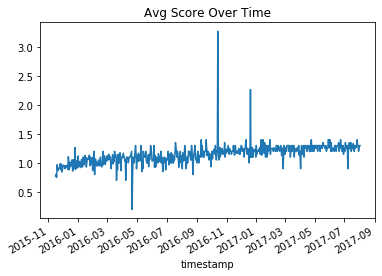

In [475]:
final_df.groupby(final_df.timestamp.dt.round('D')).score.mean().plot(x='timestamp')
plt.title('Avg Score Over Time')

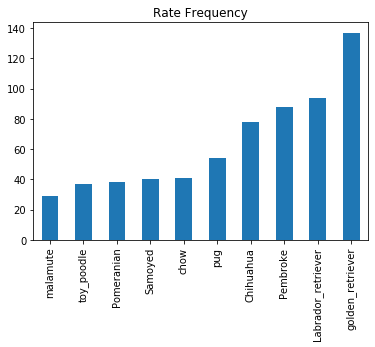

In [467]:
# top 10 rated dogs by volume
%matplotlib inline
plt.title('Rate Frequency')
final_df.p1.value_counts().sort_values().tail(10).plot(kind='bar',)

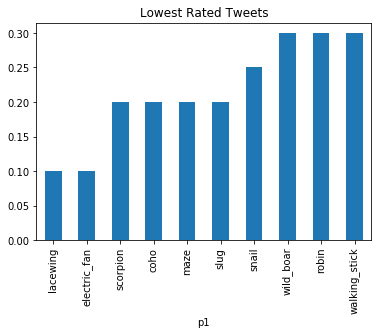

In [476]:
# Lowest Rated Tweets
plt.title('Lowest Rated Tweets')
final_df.groupby('p1').score.mean().sort_values().head(10).plot(kind='bar')

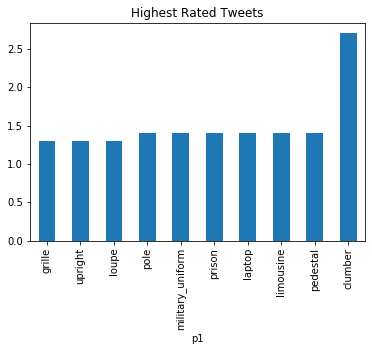

In [477]:
# Highest Rated Tweets
plt.title('Highest Rated Tweets')
final_df.groupby('p1').score.mean().sort_values().tail(10).plot(kind='bar')

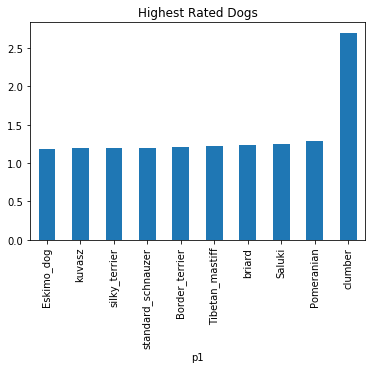

In [508]:
# Highest Rated Tweets (filtered for dogs only)
plt.title('Highest Rated Dogs')
final_df.query('p1_dog == True').groupby('p1').score.mean().sort_values().tail(10).plot(kind='bar')

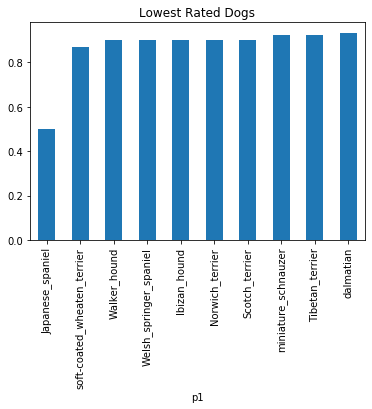

In [509]:
# Lowest Rated Tweets (filtered for dogs only)
plt.title('Lowest Rated Dogs')
final_df.query('p1_dog == True').groupby('p1').score.mean().sort_values().head(10).plot(kind='bar')

## Add another dimension to insights

In [516]:
import seaborn as sns
sns.set(color_codes=True)

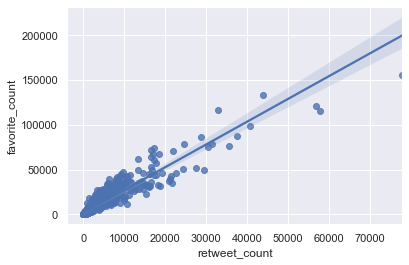

In [517]:
sns.regplot(x='retweet_count',y='favorite_count',data=final_df);

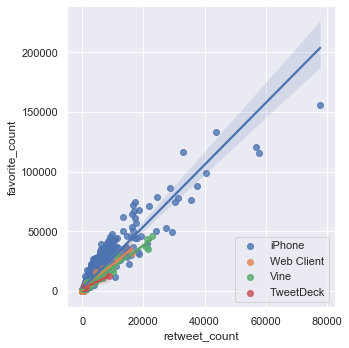

In [531]:
sns.lmplot(x='retweet_count',y='favorite_count',hue='source_x', legend=False,data=final_df);
plt.legend(loc='lower right')

In [519]:
final_df

,tweet_id,timestamp,source_x,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,score,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,favorite_count,retweet_count,lang
0,892420643555336193,2017-08-01 16:23:56+00:00,iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,1.3,...,False,bagel,0.085851,False,banana,0.076110,False,36217.0,7707.0,en
1,892177421306343426,2017-08-01 00:17:27+00:00,iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,1.3,...,True,Pekinese,0.090647,True,papillon,0.068957,True,31225.0,5697.0,en
2,891815181378084864,2017-07-31 00:18:03+00:00,iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,1.2,...,True,malamute,0.078253,True,kelpie,0.031379,True,23505.0,3777.0,en
3,891689557279858688,2017-07-30 15:58:51+00:00,iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,1.3,...,False,Labrador_retriever,0.168086,True,spatula,0.040836,False,39485.0,7864.0,en
4,891327558926688256,2017-07-29 16:00:24+00:00,iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,1.2,...,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True,37704.0,8481.0,en
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,666049248165822465,2015-11-16 00:24:50+00:00,iPhone,Here we have a 1949 1st generation vulpix. Enj...,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,0.5,...,True,Rottweiler,0.243682,True,Doberman,0.154629,True,96.0,39.0,en
2087,666044226329800704,2015-11-16 00:04:52+00:00,iPhone,This is a purebred Piers Morgan. Loves to Netf...,https://twitter.com/dog_rates/status/666044226...,6,10,None,None,0.6,...,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,272.0,132.0,en
2088,666033412701032449,2015-11-15 23:21:54+00:00,iPhone,Here is a very happy pup. Big fan of well-main...,https://twitter.com/dog_rates/status/666033412...,9,10,None,None,0.9,...,True,malinois,0.138584,True,bloodhound,0.116197,True,112.0,41.0,en
2089,666029285002620928,2015-11-15 23:05:30+00:00,iPhone,This is a western brown Mitsubishi terrier. Up...,https://twitter.com/dog_rates/status/666029285...,7,10,None,None,0.7,...,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,121.0,42.0,en


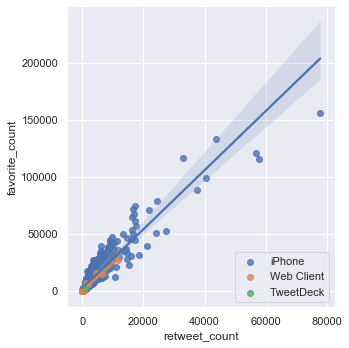

In [532]:
sns.lmplot(x='retweet_count',y='favorite_count',hue='source_x', legend=False,data=final_df.query('p1_dog == True'));
plt.legend(loc='lower right')